In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras


In [36]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_i.shape,test_i.shape)
print(train_labels)
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
        'Sandal','Shirt','Sneaker','Bag','Ankle boot']

(60000, 28, 28) (60000, 28, 28)
[9 0 0 ... 3 0 5]


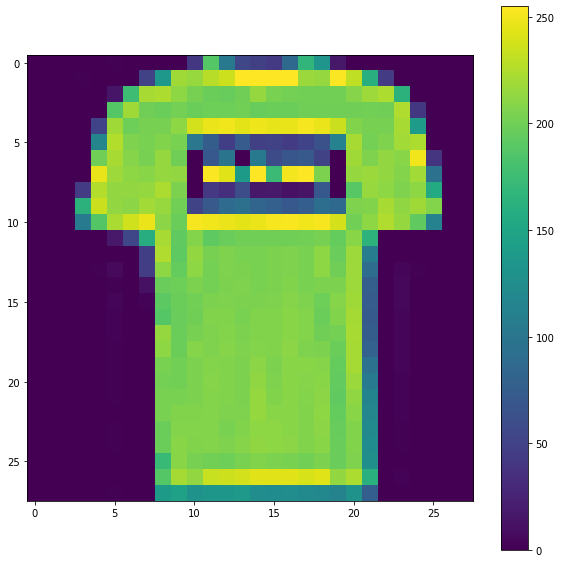

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

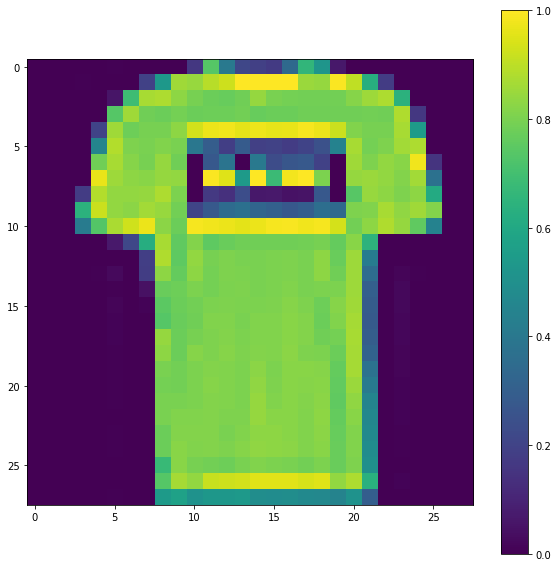

In [28]:
train_images = train_images.astype("float") / 255.0
test_images = test_images.astype("float") / 255.0
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

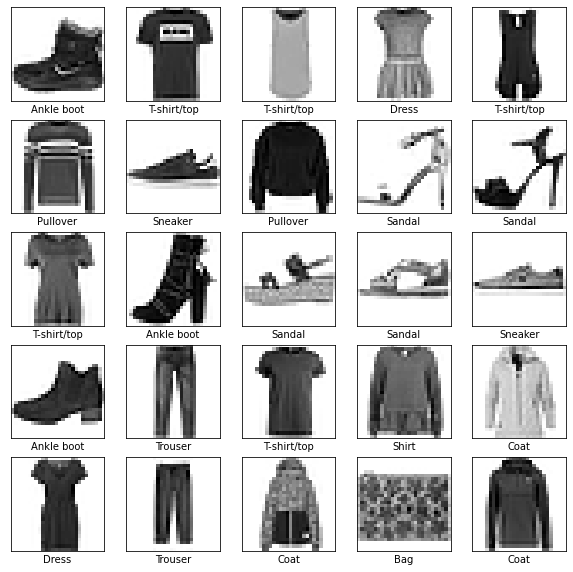

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
model = keras.Sequential([
 #2차원배열(28x28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
 keras.layers.Flatten(input_shape=(28,28)),
 #128개의 노드(뉴런)
 keras.layers.Dense(128, activation=tf.nn.relu),
 #10개의 노드의 소프트맥스층 (10개의 확률을 반환하고 반환된 값은 전체 합의 1이됨)
 #각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [31]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4965 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8906


In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8785


In [34]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

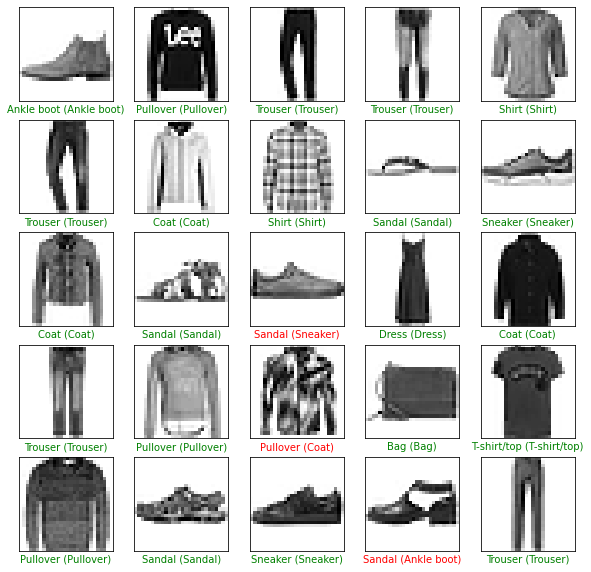

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # predictions에서 가장 큰 값을 predicted_label 로 가져온다.
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    # 이때 실제 test_label과 일치하면 초록색 글씨로,
    if predicted_label == true_label:
        color = 'green'
    # 일치하지 않으면 빨간색 글씨로 출력한다.
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
        class_names[true_label]),
        color=color)

In [38]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

In [39]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

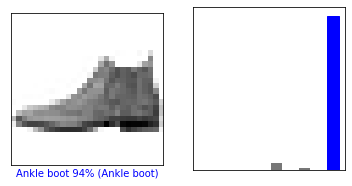

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

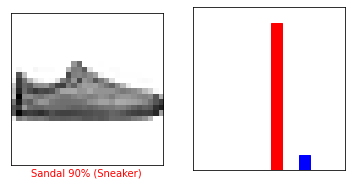

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

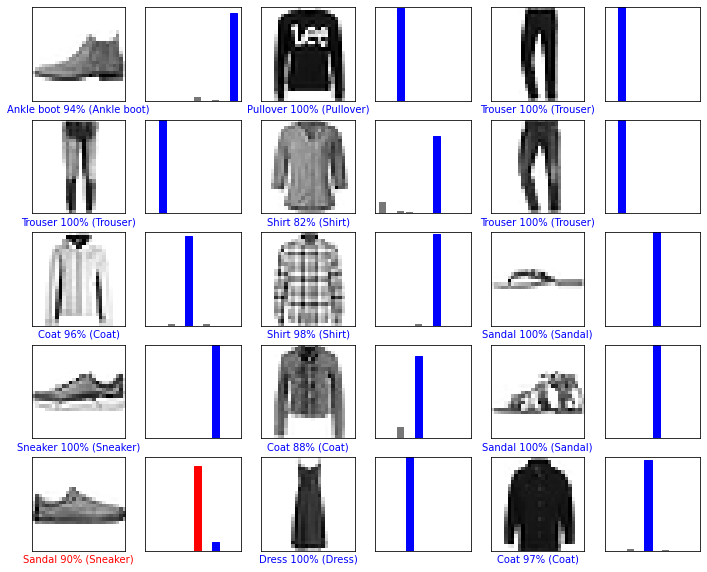

In [42]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
img = test_images[0]
print(img.shape)
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


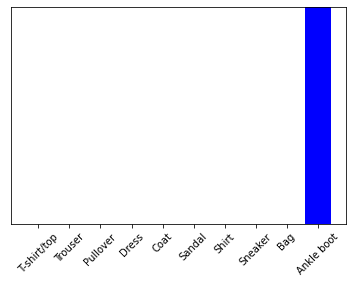

In [44]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
